# Aligning
`Aligning` is a module for you to align two separated datasets together, for better comparison of the data. The main idea is to get a matrix $Q$ from the input data sets $X$ and $Y$, Then use $Q$ for aligning $X$ to where $Y$ is. The differences among classes in `Aligning` is the principle of how we get the orthogonal matrix $Q$ from inputs. For more information about the algorithm of these classes, see [reference](https://graspy.neurodata.io/reference/align.html).

This demo shows simple examples of how to use SignFlips, SeedlessProcrustes, and OrthogonalProcrustes in `Aligning`, and the different performance between these classes. 

In [1]:
import graspologic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group

%matplotlib inline

## Simple rotation example for each classes

This part mainly explains how to use SignFlips, SeedlessProcrustes, and OrthogonalProcrustesFirst, with a simple rotation input example. First, let's build two simple apart datasets, where $Y$ is a randomly rotated group from $X$.

In [2]:
np.random.seed(1)
X = np.random.rand(10,2)
Z = special_ortho_group.rvs(2)
Y = X@Z

Then use different classes in Aligning for aligning $X$ back with $Y$. Let's see the different performances between classes.

### SignFlips

Substantially, SignFlips is a function for fliping one dataset $X$, to another dimension. A diagonal orthogonal matrix $Q$ will be generated based on $X$ and $Y$. By $X@Q$, All the enteries in $X$ are fliped along axises, to get it to the quadrant where $Y$ is. 

Here we introduce SignFlips to get the fliped dataset, X_prime_SignFlips.

In [3]:
from graspologic.align import SignFlips
X_prime_SignFlips = SignFlips().fit_transform(X, Y)

Name the fliped dataset to be X@Q_SignFlips. Then plot $X$, $Y$, X@Q_SignFlips

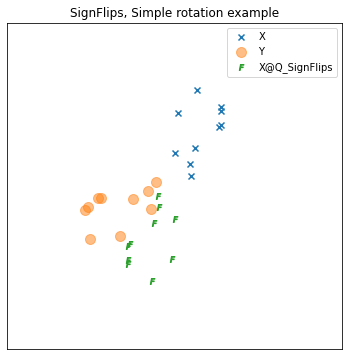

In [4]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SignFlips, Simple rotation example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", 
            marker='$F$')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

Here we can see, SignFlips simply filped $X$ along x-axis and y-axis to get X@Q_SignFlips to the third quadrant, the quadrant where $Y$ is. There is no further algning for this class. This class can also be used to bring the dataset to the first orthant, if you provide the identity matrix as the second dataset.

### OrthogonalProcrustes

In OrthogonalProcrustes, an orthogonal matrix $Q$ that most closely maps $X$ to $Y$ is generated based on $X$ and $Y$. This class is based on the solution of classical orthogonal Procrustes problem, which means it requires the two datasets $X$ and $Y$ to have the equal shape ($n$, $d$). The equal shape between datasets indicates that $X$ and $Y$ have the same number of entries and some correspondence between the entries, a.k.a, the vertex $i$ in graph $X$ has the same latent position as the vertex $i$ in graph $Y$ in graph embedings. This class has similar function as *[scipy.linal.orthogonal_procrustes()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.orthogonal_procrustes.html)*.

Here we use OrthogonalProcrustes to get the transformed dataset, X_prime_Orthogonal.

In [5]:
from graspologic.align import OrthogonalProcrustes
X_prime_Orthogonal = OrthogonalProcrustes().fit_transform(X, Y)

Name the rotated dataset to be X@Q_OrthogonalProcrustes. Plot $X$, $Y$, X@Q_OrthogonalProcrustes

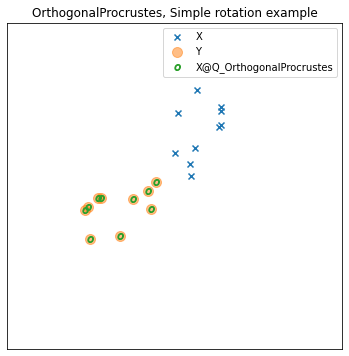

In [6]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("OrthogonalProcrustes, Simple rotation example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], 
            label="X@Q_OrthogonalProcrustes", marker='$O$')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

### SeedlessProcrustes

SeedlessProcrustes try to get the matrix $Q$ via an iterative algorithm that alternates optimal transport and regular procrustes.
It is not restricted by the shape diferences between datasets, i.e., it can be applied to two datasets with/without the same number of entries regardless whether there is correspondence between entries or not. 

Here we use it for aligning the two same datasets $X$, $Y$ showed above. Introduce SeedlessProcrustes to get the transformed dataset, X_prime_Seedless.

In [7]:
from graspologic.align import SeedlessProcrustes
X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)

Name the rotated dataset to be X@Q_SeedlessProcrustes. Plot $X$, $Y$, X@Q_SeedlessProcrustes

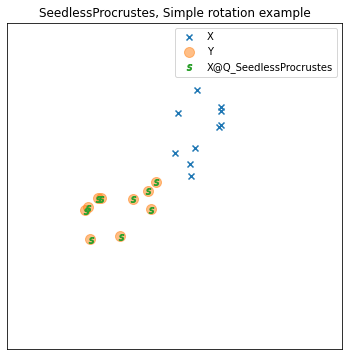

In [8]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, Simple rotation example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], 
            label="X@Q_SeedlessProcrustes", marker='$S$')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

### Comparison between SignFlips, OrthogonalProcrustes, SeedlessProcrustes

Plot the outcomes together.

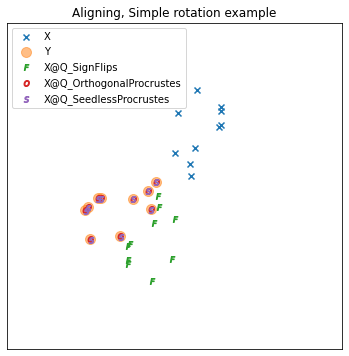

In [9]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("Aligning, Simple rotation example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], 
            label="X@Q_SignFlips", marker='$F$')
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], 
            label="X@Q_OrthogonalProcrustes", marker='$o$')
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], 
            label="X@Q_SeedlessProcrustes", marker='$S$')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

Introduce *[np.linlg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)* to calculate the Frobenius norm of (X_prime - Y), for quantificaion of the aligning ability in this example.

In [10]:
norm_SignFlips = np.linalg.norm(X_prime_SignFlips - Y)
norm_Orthogonal = np.linalg.norm(X_prime_Orthogonal - Y)
norm_Seedless = np.linalg.norm(X_prime_Seedless - Y)
print('norm_SignFlips=', norm_SignFlips)
print('norm_Orthogonal=', norm_Orthogonal)
print('norm_Seedless=', norm_Seedless)

norm_SignFlips= 1.4779981074320632
norm_Orthogonal= 3.437379846455101e-16
norm_Seedless= 0.02152739003460826


SignFlips only do the simple flips of datasets along axises. Both OrthogonalProcrustes and SeedlessProcrustes align $X$ very well with the exact palce and distribution of $Y$. 

## Special example for SignFlips and SeedlessProcrustes

This part includes two special example for SignFlips and SeedlessProcrustes respectively, for better presenting their functions.

### Simple fliping example for SignFlips 

For better understanding of how exactly SignFlips works, here is an example of using SignFlips in simple-fliping situation. In this example, $Y$ is a set rotated by 180 degree from $X$. 

In [11]:
np.random.seed(1)
X = np.random.rand(10,2)
Y = -X

Use SignFlips to get the fliped dataset, X_prime_SignFlips.

In [12]:
from graspologic.align import SignFlips
X_prime_SignFlips = SignFlips().fit_transform(X, Y)

Plot out.

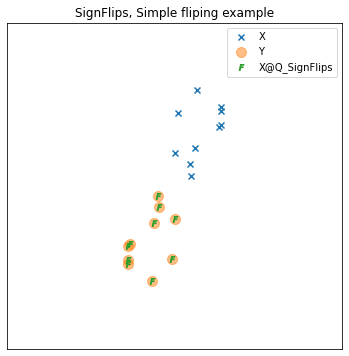

In [13]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SignFlips, Simple fliping example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], 
            label="X@Q_SignFlips", marker='$F$')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

Introduce np.linlg.norm to calculate the Frobenius norm of (X_prime - Y), for quantificaion of the aligning ability in this example.

In [14]:
norm_SignFlips = np.linalg.norm(X_prime_SignFlips - Y)
print('norm_SignFlips=', norm_SignFlips)

norm_SignFlips= 0.0


Since SignFlips only do the simple flips of datasets along axises, and that's how $Y$ comes from in this example, norm_SignFlips is 0, i.e. $Y$ is perfectly overlaped by X@Q_SignFlips. 

### Unmatched input example for Seedlessprocrustes

As mentioned above, SeedlessProcrustes can be applied to two datasets with different number of entries. Here an example for using it on two unmatched input datasets.

First, create two sample from multivariate normal distribution (MVN).

In [15]:
np.random.seed(1)
I = np.identity(2)
Z = special_ortho_group.rvs(2)
X = np.random.multivariate_normal([0.5, 0.5], 0.05 * I, 20)
Y = np.random.multivariate_normal([0.5, 0.5], 0.05 * I, 10) @ Z

Introduce SeedlessProcrustes to get the transformed dataset, X_prime_Seedless.

In [16]:
from graspologic.align import SeedlessProcrustes
X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)

Plot it out.

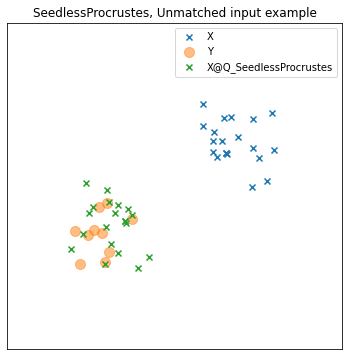

In [17]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, Unmatched input example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], 
            label="X@Q_SeedlessProcrustes", marker='x')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();